In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
random_state = 20
threshold = 1

In [3]:
df = pd.read_csv("test_data/S Parameter Plot 2.csv")

In [4]:
df

,Pad_L [cm],Pad_W [cm],Freq [GHz],"dB(S(1,1)) []"
0,0.35,0.4,2.00,-0.039230
1,0.35,0.4,2.18,-0.053142
2,0.35,0.4,2.36,-0.067467
3,0.35,0.4,2.54,-0.082482
4,0.35,0.4,2.72,-0.098518
...,...,...,...,...
904,0.45,0.8,19.28,-5.728851
905,0.45,0.8,19.46,-6.172101
906,0.45,0.8,19.64,-7.396826
907,0.45,0.8,19.82,-7.555971


<Axes: xlabel='Freq [GHz]'>

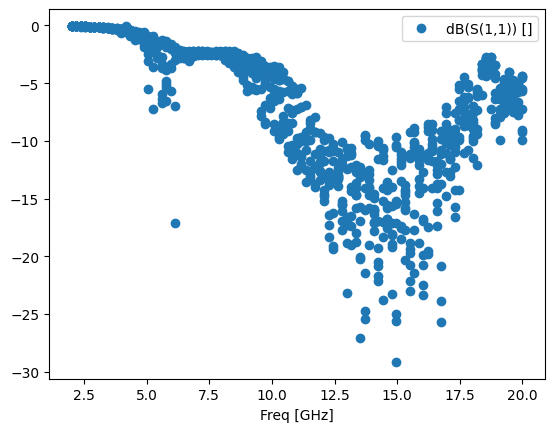

In [5]:
df.plot(x=df.columns[2], y=df.columns[3], style='o')

In [6]:
input_x = df[['Pad_L [cm]', 'Pad_W [cm]', 'Freq [GHz]']]
input_y = df[['dB(S(1,1)) []']]

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, random_state=random_state)

In [9]:
model = DecisionTreeRegressor(random_state=random_state)

In [10]:
pipeline = Pipeline(steps=[('normalize', scaler), ('model', model)])

In [11]:
pipeline_fit = pipeline.fit(X_train, y_train)
predictions = pipeline_fit.predict(X_test)


In [12]:
results = X_test.copy()

In [13]:
# Check if predicted value is threshold amount above or below actual value
def is_in_threshold(actual, pred):
    return pred <= actual + threshold and pred >= actual - threshold

In [14]:
def create_tf_column(results):
    return results.apply(lambda x: is_in_threshold(x['y_test'], x['predictions']), axis=1)

In [15]:
def get_score(X_test, y_test, predictions, clf_dt):
    predictions = clf_dt.predict(X_test)
    dataframe = pd.DataFrame(X_test.copy(), columns=input_x.columns)
    dataframe['y_test'] = y_test.values
    dataframe['predictions'] = predictions
    return create_tf_column(dataframe).value_counts().get(True) / dataframe.shape[0]

In [16]:
get_score(X_test, y_test, predictions, pipeline)

0.6798245614035088

In [17]:

path = model.cost_complexity_pruning_path(X_train, y_train)

In [18]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [19]:
clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(random_state=random_state, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [20]:
# train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [get_score(X_test, y_test, predictions, clf_dt) for clf_dt in clf_dts]

In [21]:
test_scores

[0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210526315,
 0.6973684210

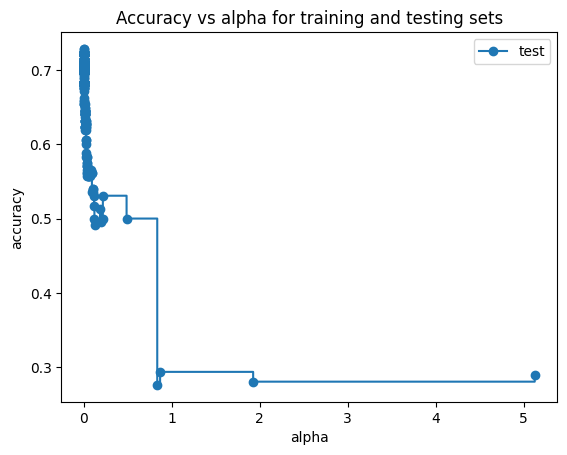

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
# ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()
